<a href="https://colab.research.google.com/github/VikitoHextech/TAREAS-SIMULACION/blob/main/Tarea_MM1_MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Línea de espera con dos servidores en serie



Codificar en un cuaderno de Jupyter Notebook el seudocódigo de las imágenes, que modela una línea de espera con dos servidores en serie. Considere que los tiempos entre llegadas y de servicio son exponenciales. Con este código, hallar el tiempo promedio que pasa un cliente en el sistema y el tiempo promedio que pasa formado en las filas.

Buscar un ejemplo de este modelo, resuelto de manera analítica para comparar los resultados de la simulación.
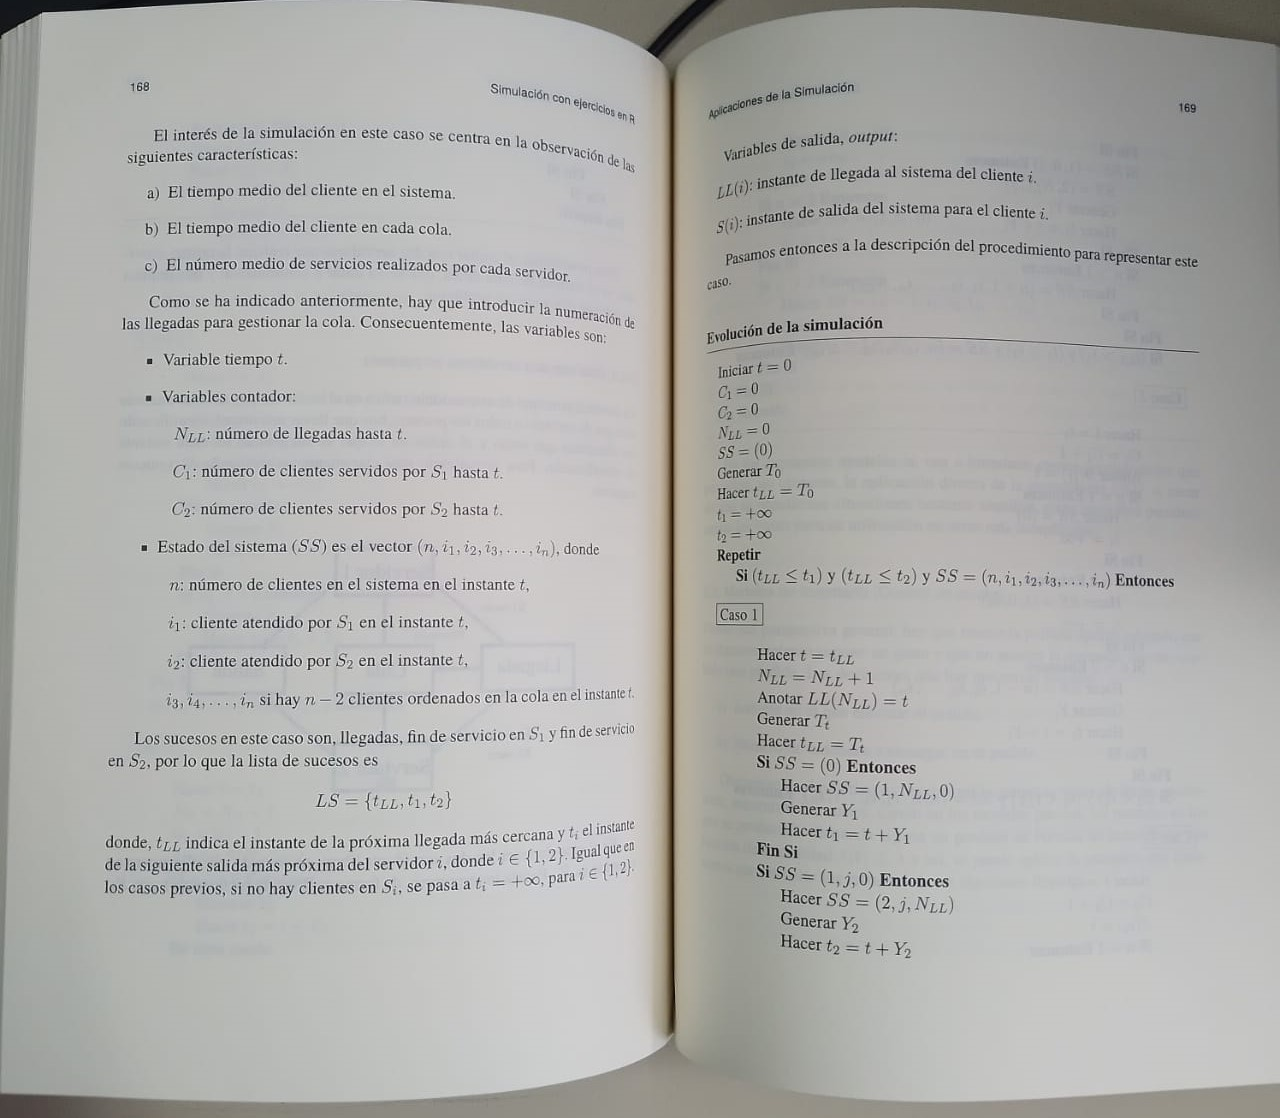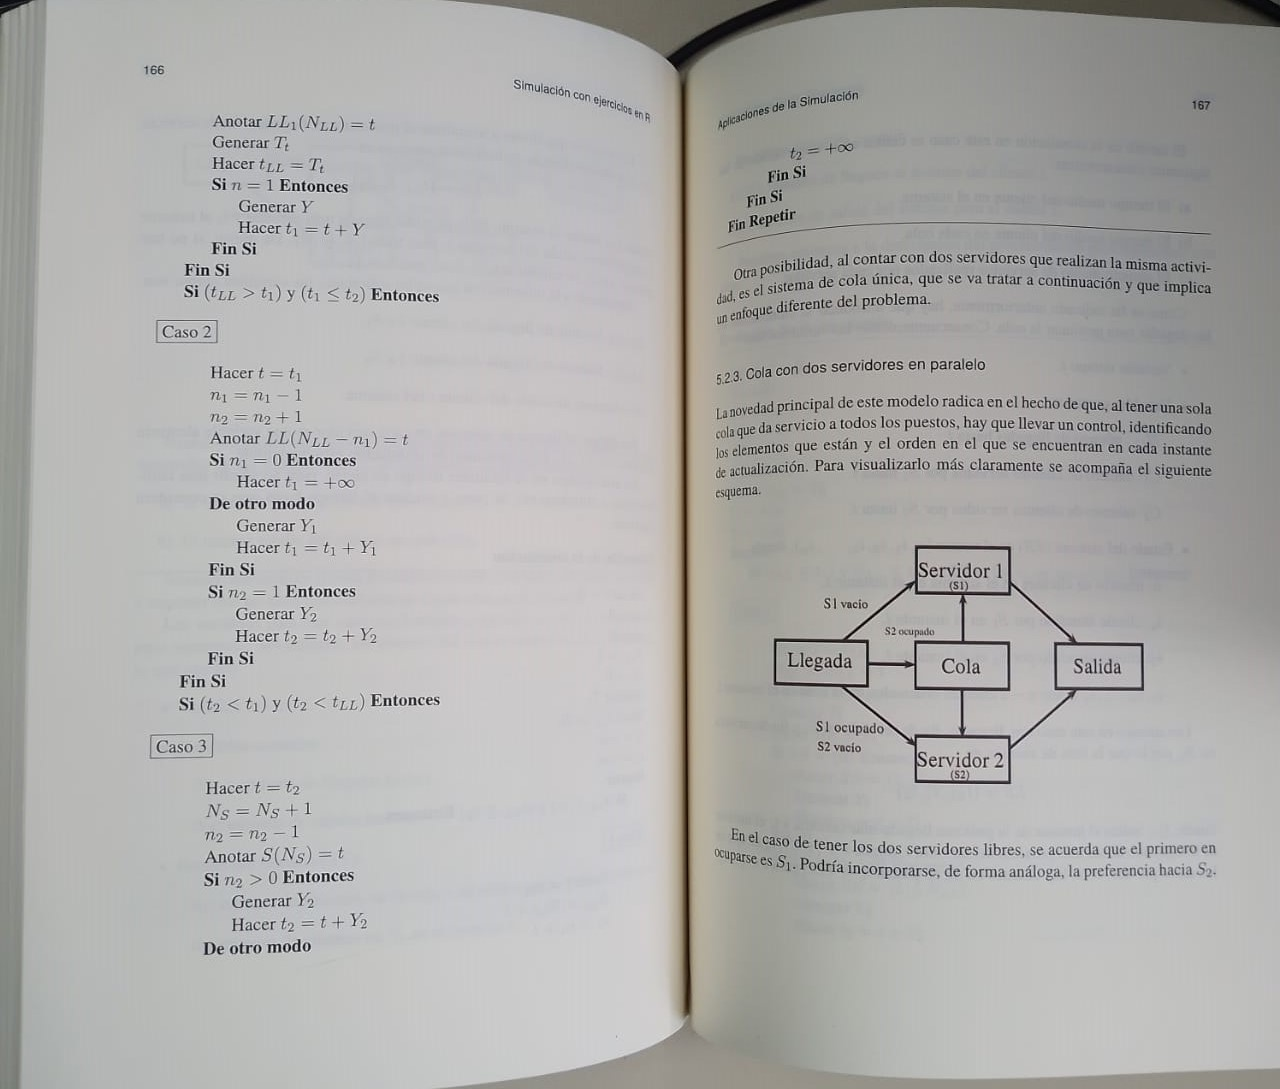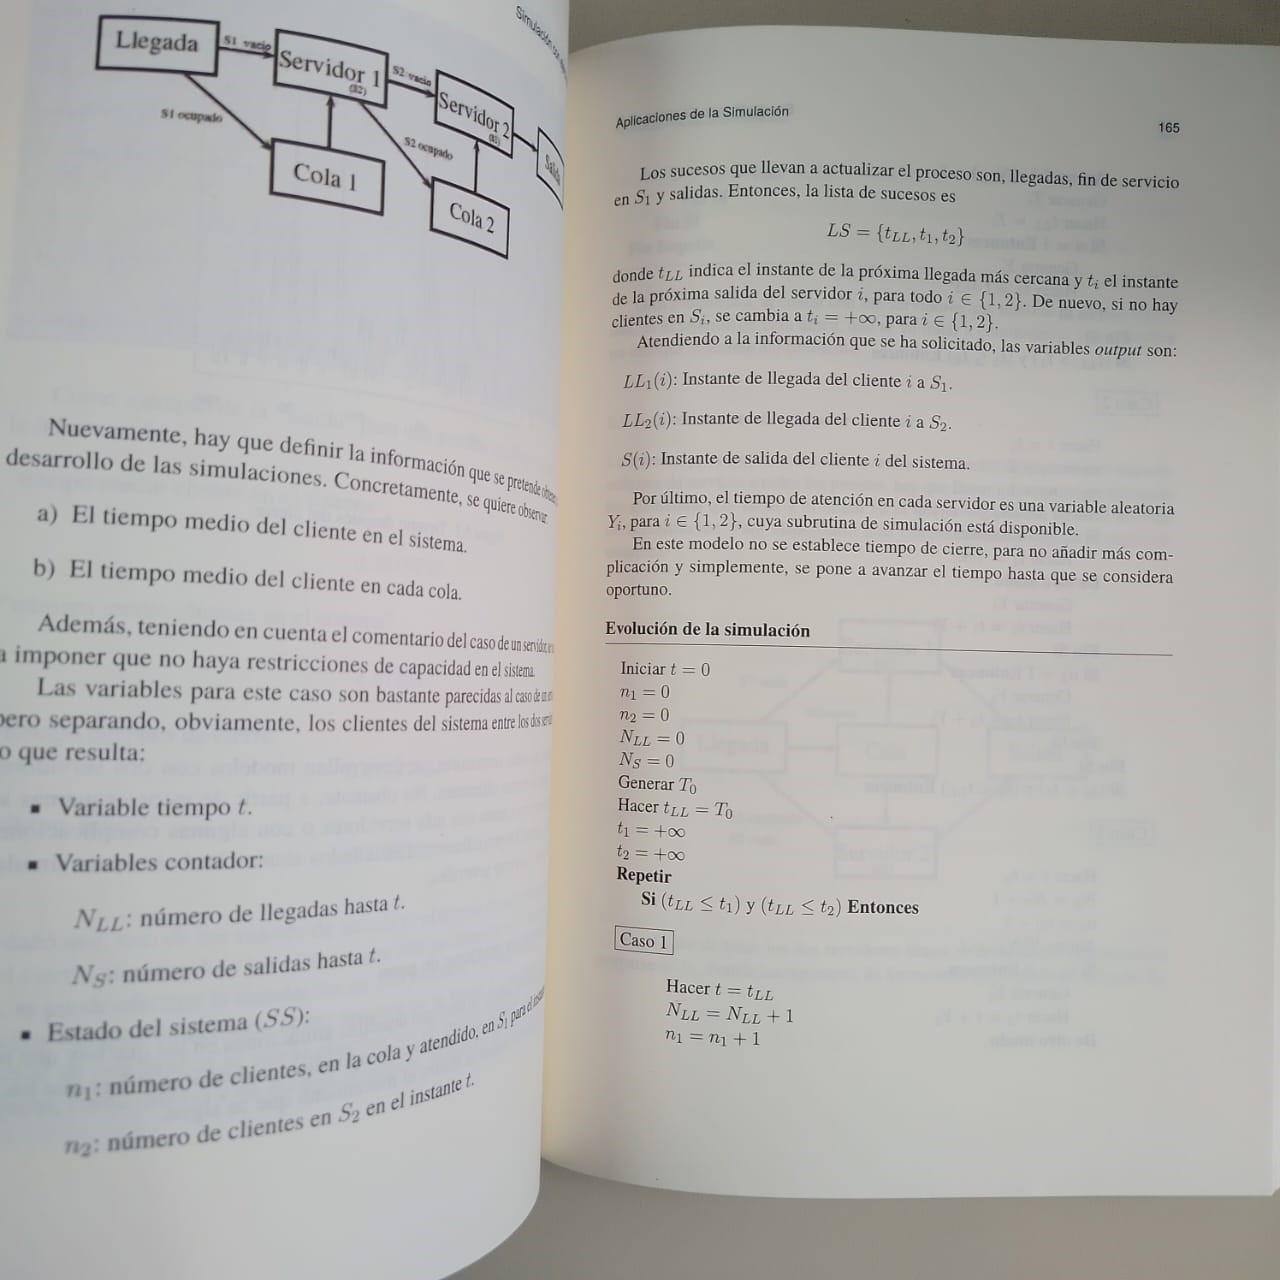

IMPORTACION DE LIBRERIAS:

In [3]:
import numpy
import matplotlib.pyplot as plt
from random import expovariate
from statistics import mean
from math import inf

Definicion de parametros:

In [8]:
lamda = 4.0
mu1 = 6.0
mu2 = 5.0
Num_Pkst = 100000
count = 0
t = 0

n1 = 0
n2 = 0

tll = expovariate(lamda)  # próximo tiempo de llegada
ts1 = inf                 # salida S1
ts2 = inf                 # salida S2

t_evento_anterior = 0.0

tll_Data = []
ts_Data = []
r_Data = []
area = []

Simulacion:

In [9]:
while count < Num_Pkst:

    if tll <= ts1 and tll <= ts2:
        t = tll
        tll_Data.append(t)
        area.append((t - t_evento_anterior) * (n1 + n2))
        t_evento_anterior = t

        n1 += 1
        tll = t + expovariate(lamda)

        if n1 == 1:
            ts1 = t + expovariate(mu1)

    elif ts1 <= tll and ts1 <= ts2:
        t = ts1
        area.append((t - t_evento_anterior) * (n1 + n2))
        t_evento_anterior = t

        n1 -= 1
        n2 += 1

        if n1 > 0:
            ts1 = t + expovariate(mu1)
        else:
            ts1 = inf
        if n2 == 1:
            ts2 = t + expovariate(mu2)

    else:
        t = ts2
        ts_Data.append(t)

        area.append((t - t_evento_anterior) * (n1 + n2))
        t_evento_anterior = t

        n2 -= 1
        count += 1
        if n2 > 0:
            ts2 = t + expovariate(mu2)
        else:
            ts2 = inf

Presentacion de Resultados:

In [10]:
for i in range(Num_Pkst):
    r_Data.append(ts_Data[i] - tll_Data[i])

print("Retraso promedio total (W): ", round(mean(r_Data), 4))
print("Clientes promedio en el sistema (L):", round(sum(area)/t, 4))

Retraso promedio total (W):  1.5022
Clientes promedio en el sistema (L): 5.9973


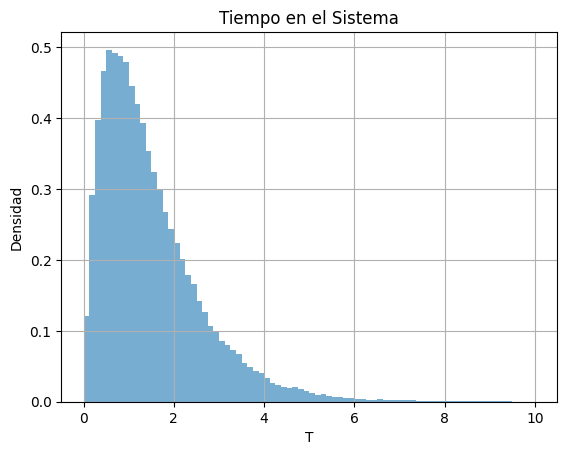

In [11]:
plt.figure()
plt.hist(r_Data, bins=80, density=True, alpha=0.6)
plt.title("Tiempo en el Sistema")
plt.xlabel("T")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()
